In [1]:
import sys
import os
sys.path.append(os.path.abspath("../.."))
from utilsforecast.preprocessing import fill_gaps
from utilsforecast.data import generate_series
from tinyshift.plot import stationarity_check, seasonal_decompose
from tinyshift.series import foreca, theoretical_limit, adi_cv, hurst_exponent, stability_index
from scipy import signal

In [2]:
df = generate_series(3, with_trend=True, static_as_categorical=False, seed=42, freq="D")

In [3]:
df.isnull().sum()

unique_id    0
ds           0
y            0
dtype: int64

In [4]:
df = fill_gaps(df, freq="D", end="per_serie", id_col="unique_id", time_col="ds")

In [5]:
def forecastability(X):
    """
    Calculate forecastability metrics for a time series.
    """
    return {
        "foreCA": foreca(X),
        "theoretical_limit": theoretical_limit(X),
        "stability_index": stability_index(X, detrend=True),
        "adi_cv": adi_cv(X),
        "hurst_exponent": hurst_exponent(X),
    }


In [6]:
df.groupby("unique_id")["y"].apply(forecastability)

unique_id                   
0          foreCA                                                  0.616734
           theoretical_limit                                       0.560748
           stability_index                                         0.937922
           adi_cv                                (1.0, 0.28499520299004516)
           hurst_exponent         (0.3290861603798452, 0.13218639190520123)
1          foreCA                                                  0.702415
           theoretical_limit                                        0.55557
           stability_index                                           0.9567
           adi_cv                                (1.0, 0.31390442751597913)
           hurst_exponent       (0.28893923895853546, 0.032089718874560705)
2          foreCA                                                  0.691794
           theoretical_limit                                       0.558174
           stability_index                                 

In [7]:
df["lag_1"] = df.groupby("unique_id")["y"].diff(1)
df["detrend"] = df.groupby("unique_id")["y"].transform(signal.detrend)
df["detrend_lag_7"] = df.groupby("unique_id")["detrend"].diff(7)

# ACF/PACF

In [8]:
df = df.set_index("ds")

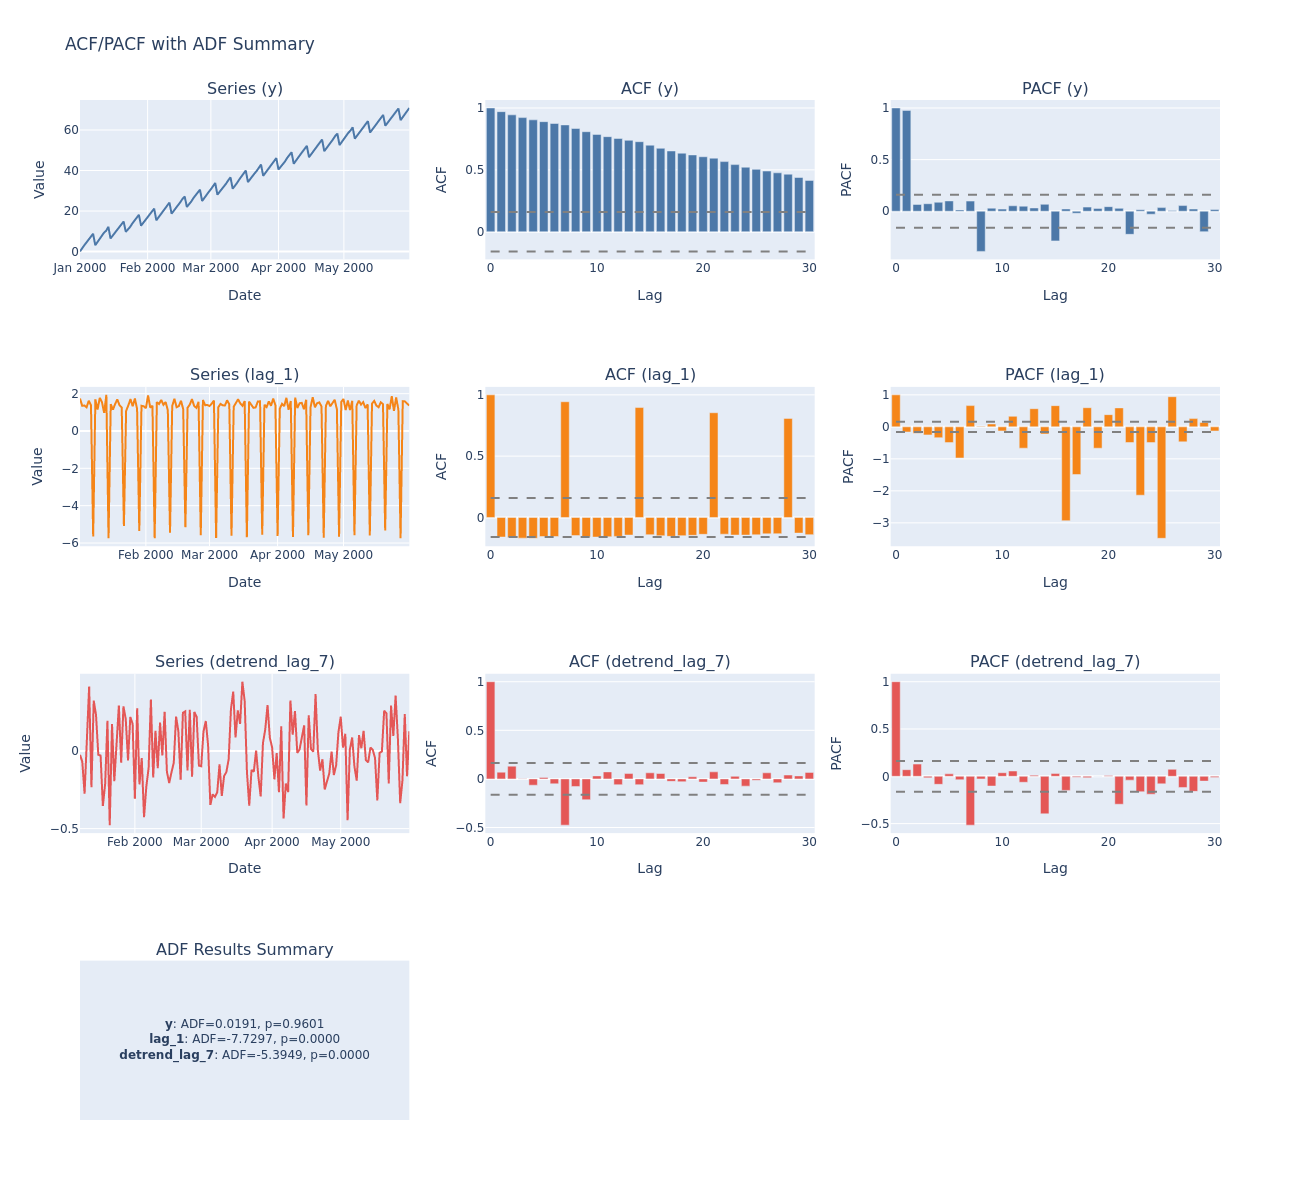

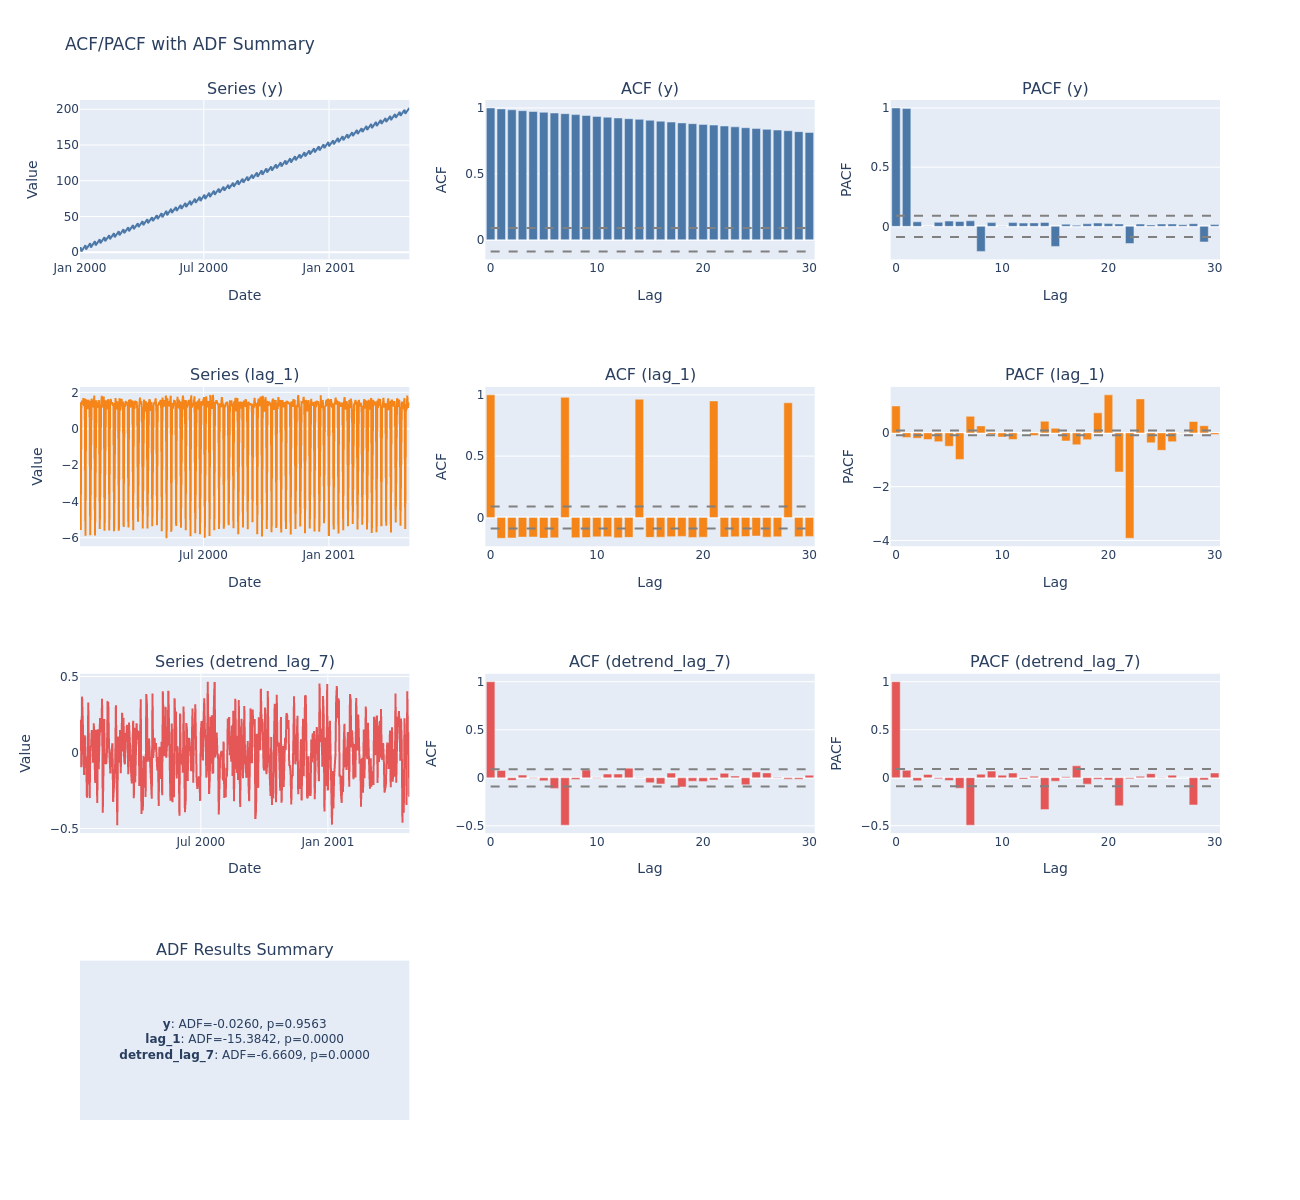

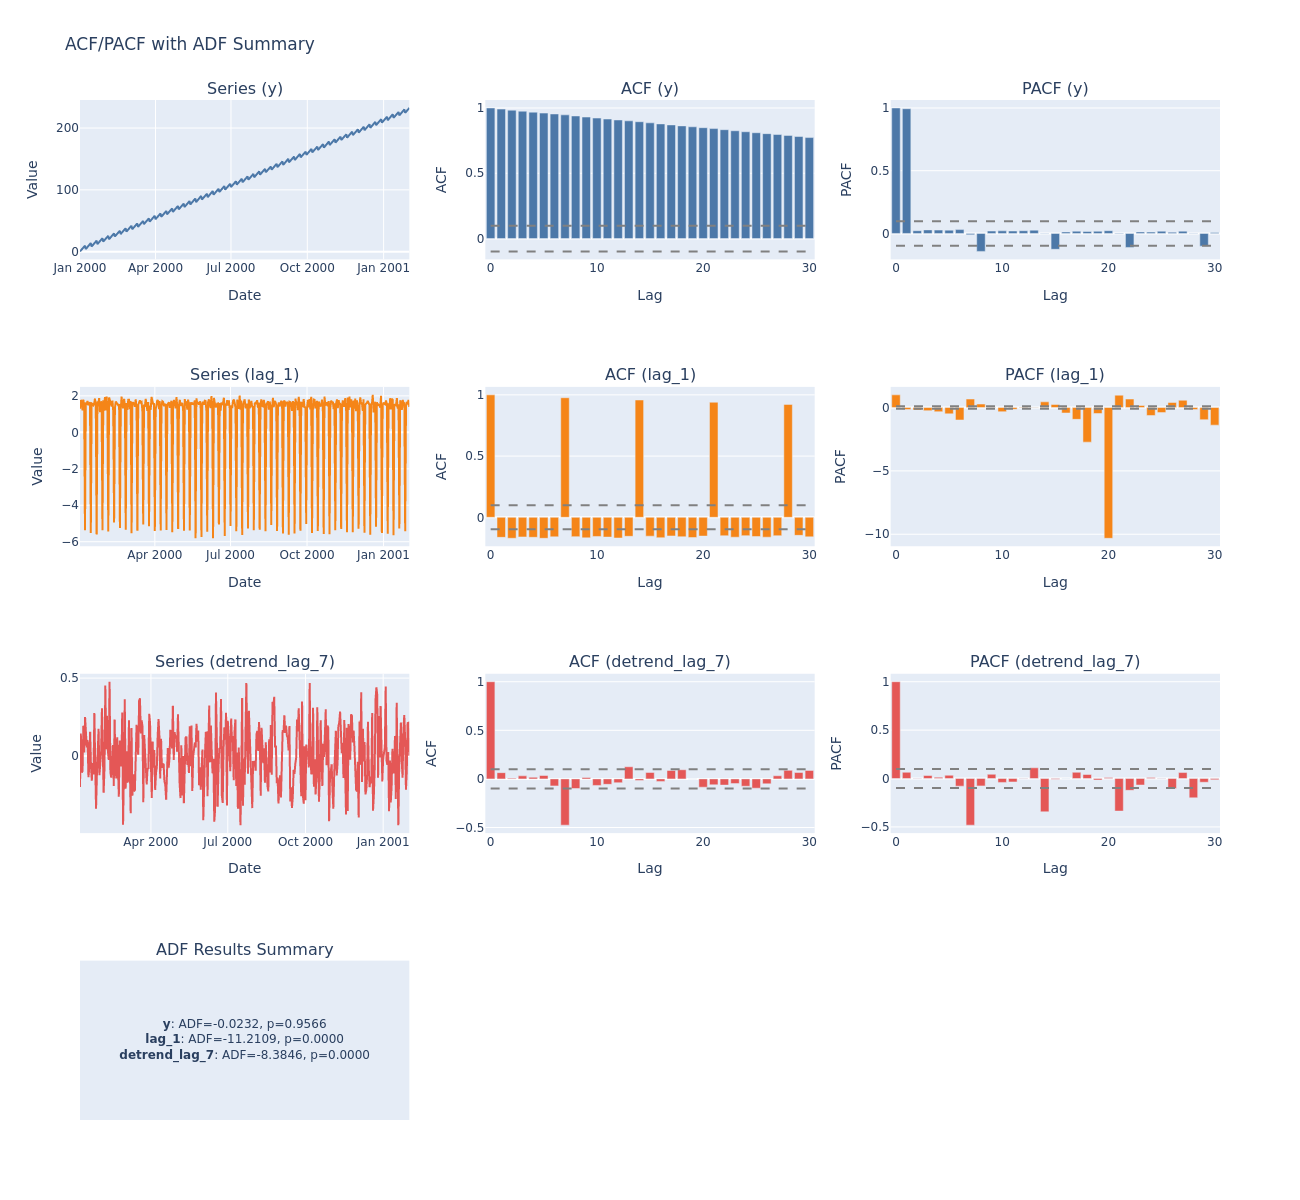

In [9]:
for id in df["unique_id"].unique():
    stationarity_check(df.loc[df["unique_id"] == id, ["y", "lag_1", "detrend_lag_7"]], fig_type="png")

# Seasonal Decomposition

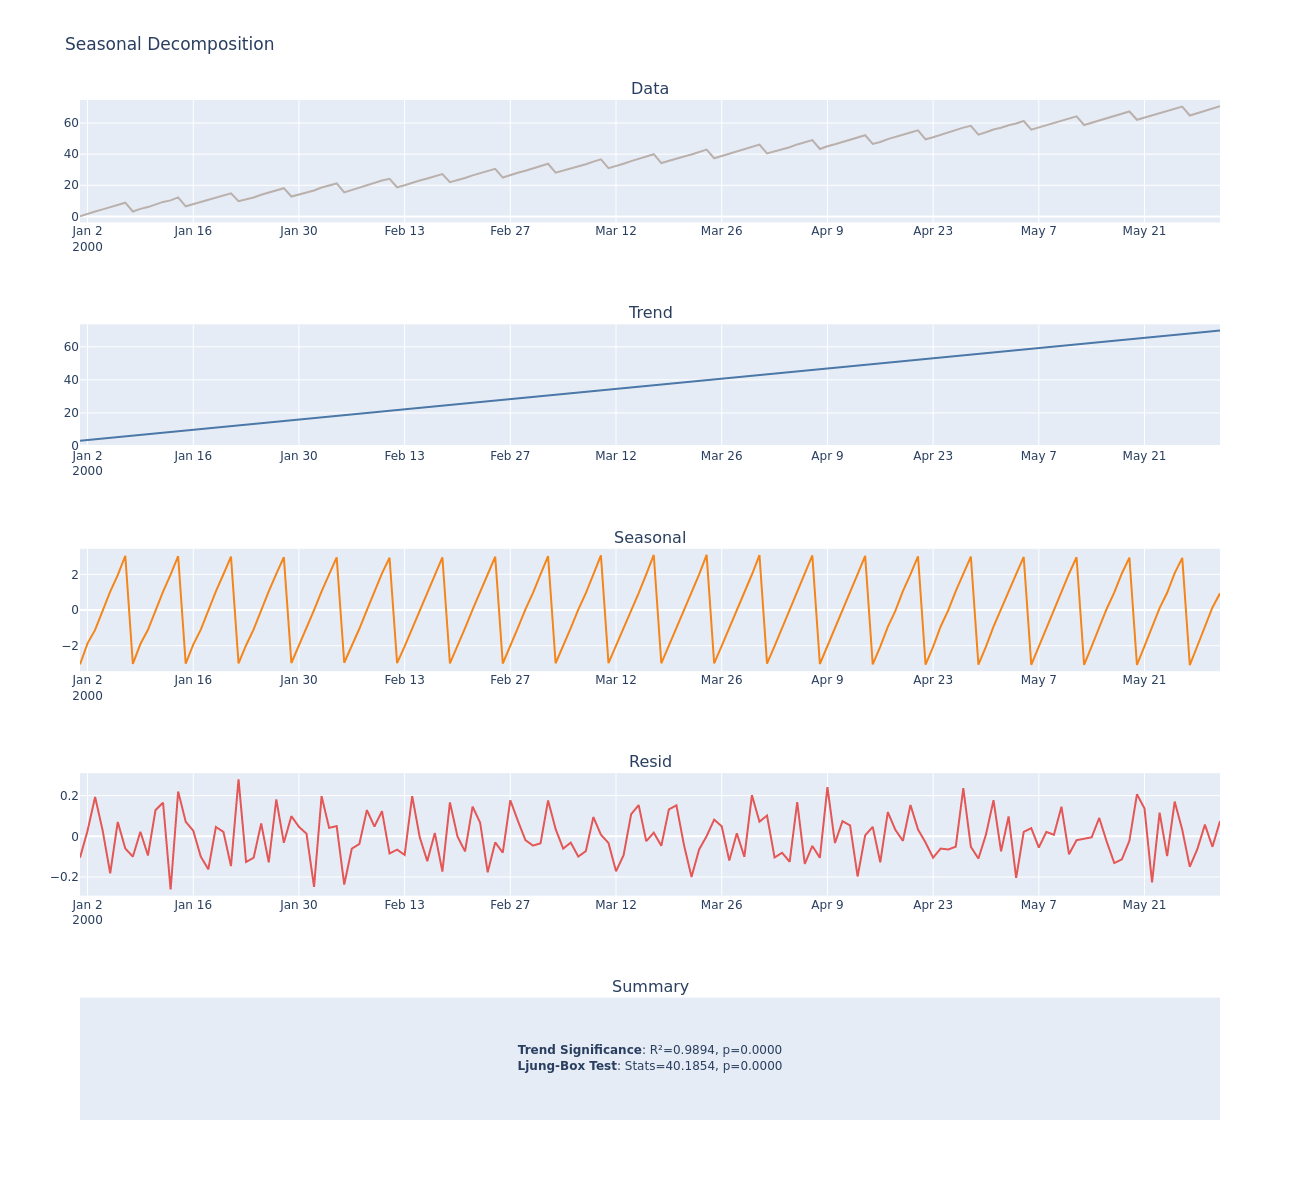

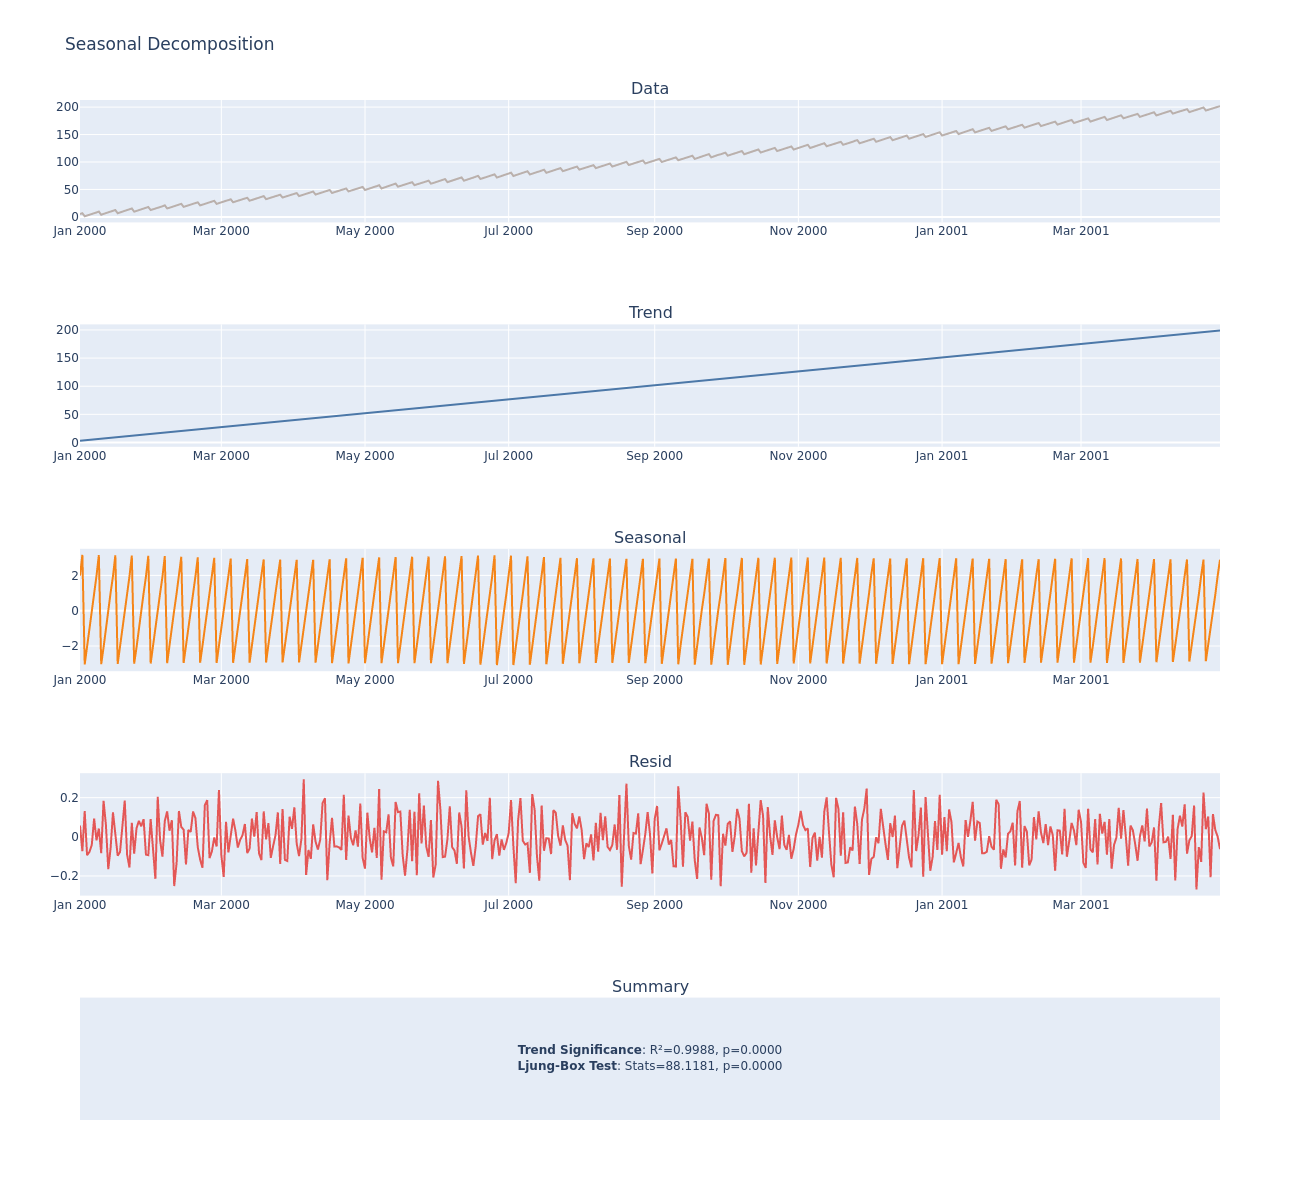

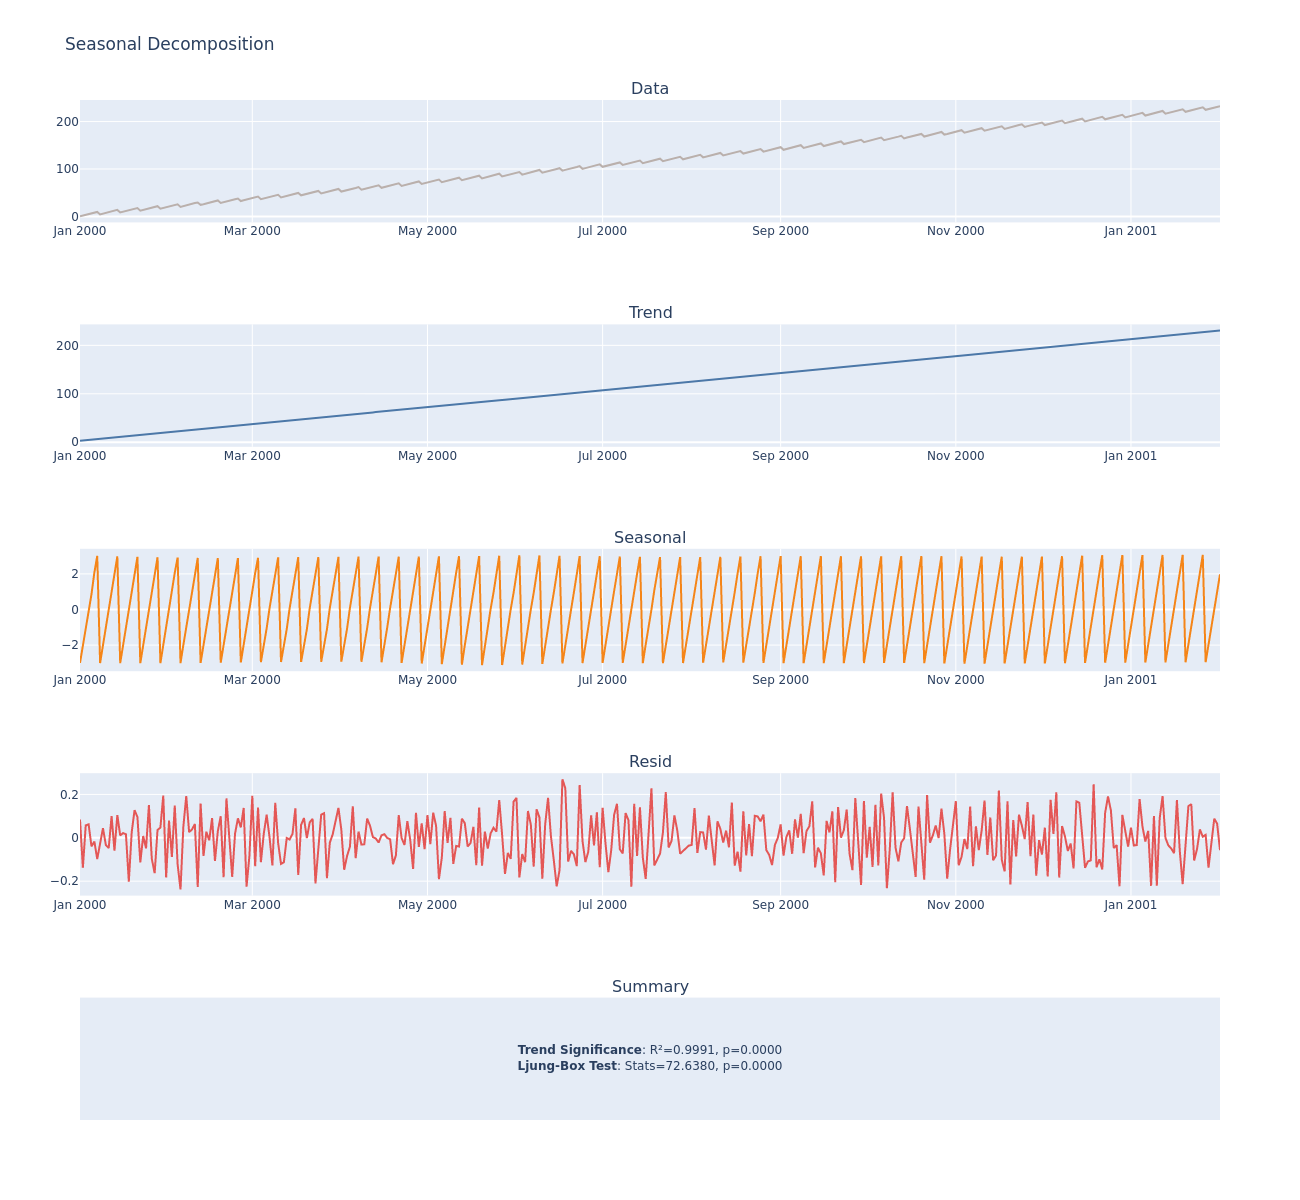

In [12]:
for id in df["unique_id"].unique():
    seasonal_decompose(
        df[df["unique_id"] == id]["y"],
        periods=7,
        fig_type="png",
    )